In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, f1_score, precision_score, recall_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

In [46]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [47]:
df.shape

(253680, 22)

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [51]:
#CONTEO DE LA VARIABLE OBJETIVO#
count = df["Diabetes_binary"].value_counts()
count

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

In [52]:
print("Porcentaje clases variable objetivo:")
print(f"Clase 1: {100*count[1]/count.sum():.2f}%")
print(f"Clase 0: {100*count[0]/count.sum():.2f}%")

Porcentaje clases variable objetivo:
Clase 1: 15.29%
Clase 0: 84.71%


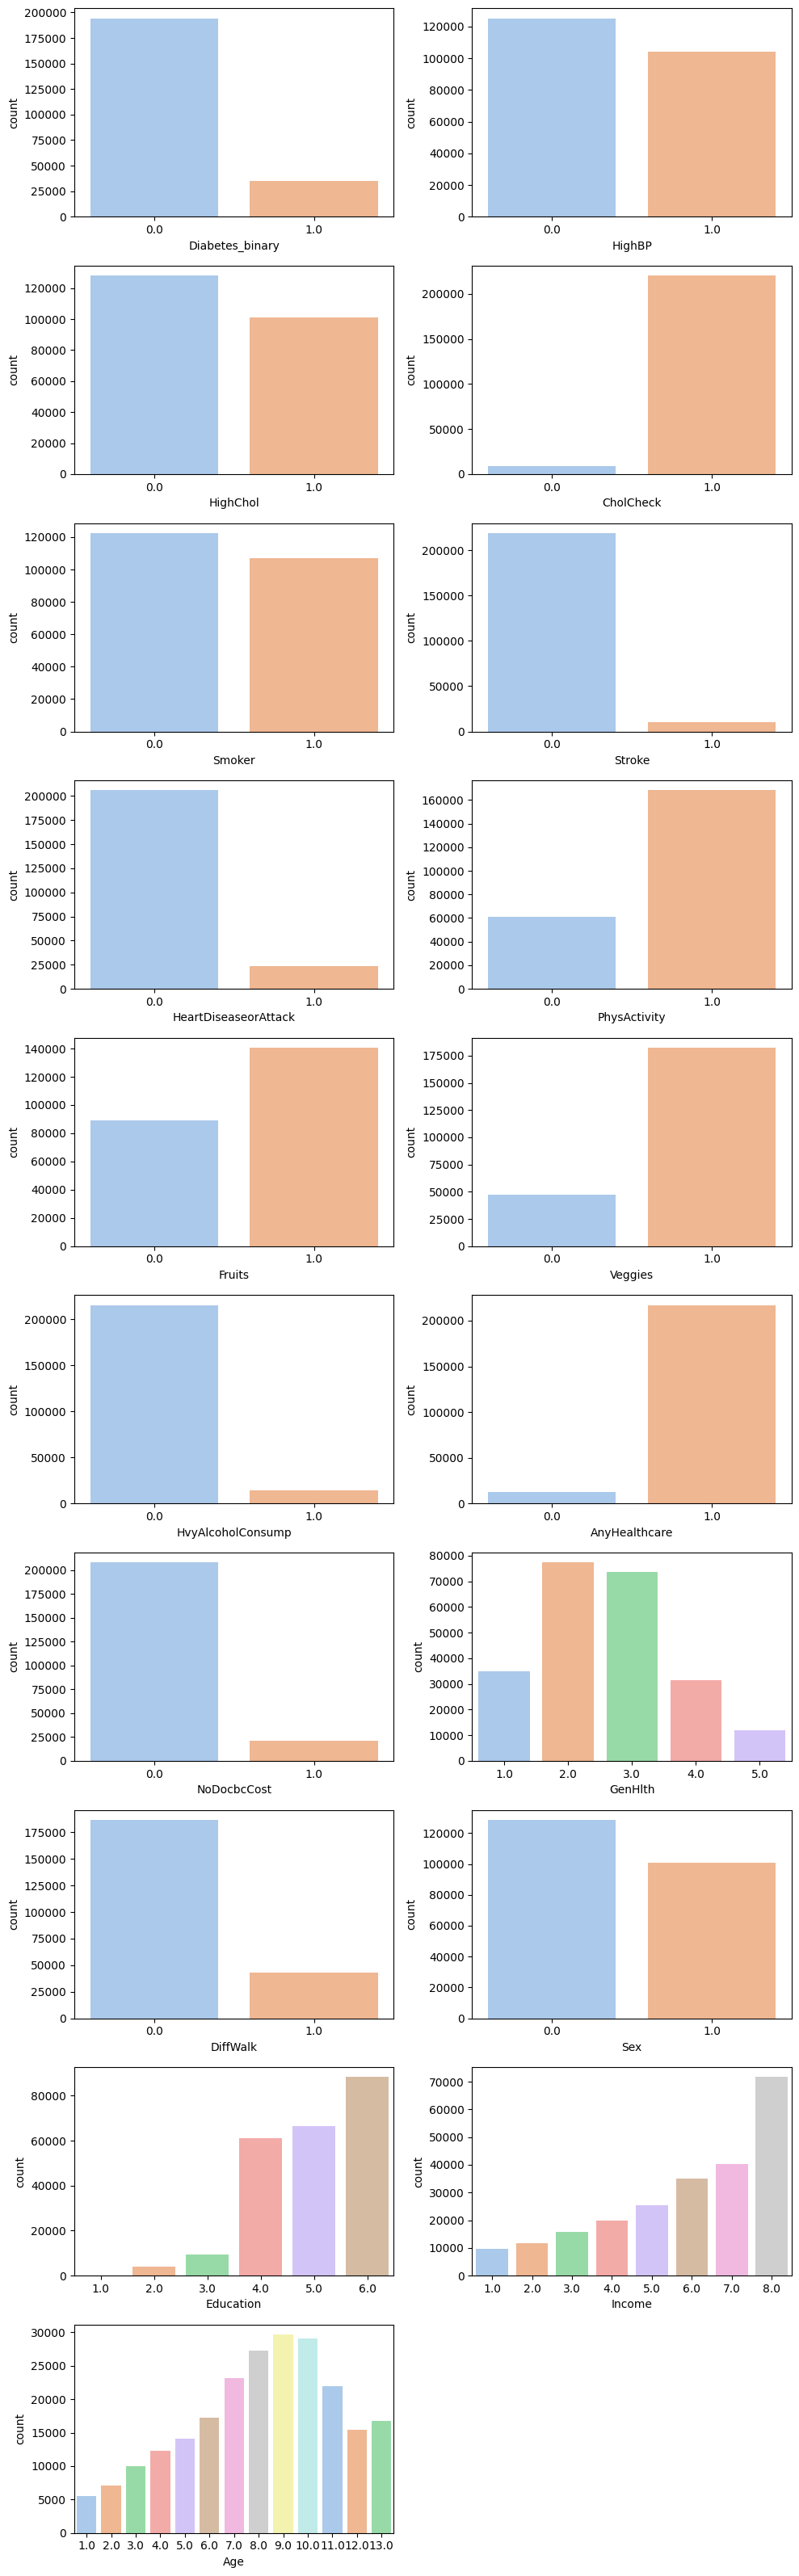

In [53]:
# Analysis of Categorical Variables
# ["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", 
# "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk", "Sex", "Education", "Income", "Age"]

# Graphic analysis
fig, axis = plt.subplots(10, 2, figsize = (10, 32))

sns.countplot(ax = axis[0, 0], data = df, x = "Diabetes_binary", palette='pastel', hue= "Diabetes_binary", legend=False)
sns.countplot(ax = axis[0, 1], data = df, x = "HighBP", palette='pastel', hue= "HighBP", legend=False)
sns.countplot(ax = axis[1, 0], data = df, x = "HighChol", palette='pastel', hue= "HighChol", legend=False)
sns.countplot(ax = axis[1, 1], data = df, x = "CholCheck", palette='pastel', hue= "CholCheck", legend=False)
sns.countplot(ax = axis[2, 0], data = df, x = "Smoker", palette='pastel', hue= "Smoker", legend=False)
sns.countplot(ax = axis[2, 1], data = df, x = "Stroke", palette='pastel', hue= "Stroke", legend=False)
sns.countplot(ax = axis[3, 0], data = df, x = "HeartDiseaseorAttack", palette='pastel', hue= "HeartDiseaseorAttack", legend=False)
sns.countplot(ax = axis[3, 1], data = df, x = "PhysActivity", palette='pastel', hue= "PhysActivity", legend=False)
sns.countplot(ax = axis[4, 0], data = df, x = "Fruits", palette='pastel', hue= "Fruits", legend=False)
sns.countplot(ax = axis[4, 1], data = df, x = "Veggies", palette='pastel', hue= "Veggies", legend=False)
sns.countplot(ax = axis[5, 0], data = df, x = "HvyAlcoholConsump", palette='pastel', hue= "HvyAlcoholConsump", legend=False)
sns.countplot(ax = axis[5, 1], data = df, x = "AnyHealthcare", palette='pastel', hue= "AnyHealthcare", legend=False)
sns.countplot(ax = axis[6, 0], data = df, x = "NoDocbcCost", palette='pastel', hue= "NoDocbcCost", legend=False)
sns.countplot(ax = axis[6, 1], data = df, x = "GenHlth", palette='pastel', hue= "GenHlth", legend=False)
sns.countplot(ax = axis[7, 0], data = df, x = "DiffWalk", palette='pastel', hue= "DiffWalk", legend=False)
sns.countplot(ax = axis[7, 1], data = df, x = "Sex", palette='pastel', hue= "Sex", legend=False)
sns.countplot(ax = axis[8, 0], data = df, x = "Education", palette='pastel', hue= "Education", legend=False)
sns.countplot(ax = axis[8, 1], data = df, x = "Income", palette='pastel', hue= "Income", legend=False)
sns.countplot(ax = axis[9, 0], data = df, x = "Age", palette='pastel', hue= "Age", legend=False)

# Delete axis
axis[9, 1].axis("off")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [54]:
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


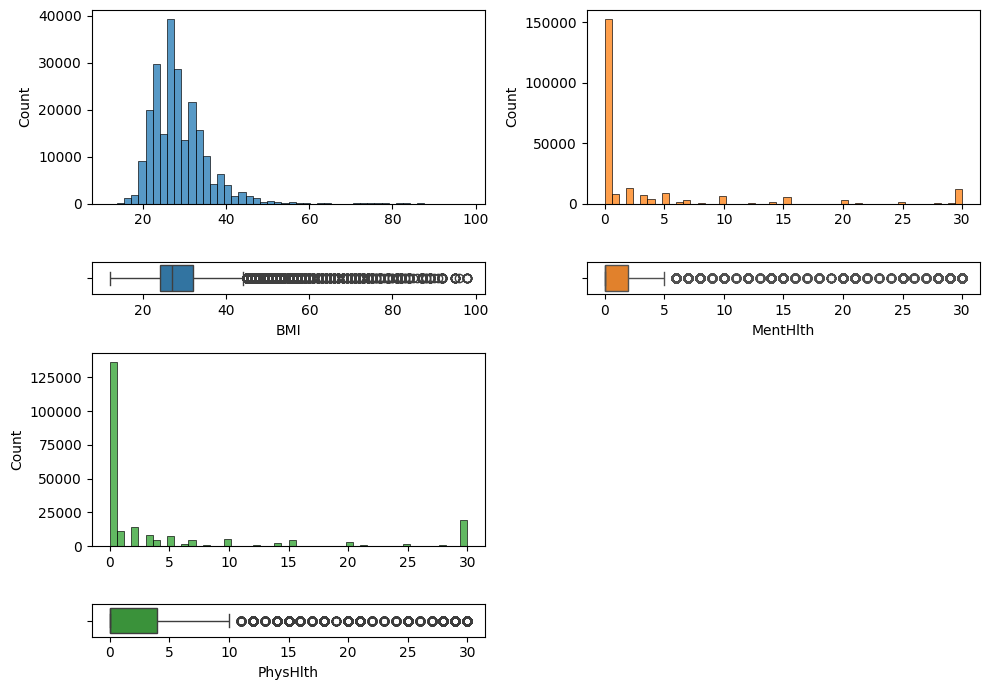

In [55]:
#ANALISIS DE VARIABLES NUMERICAS#

# ["BMI", "MentHlth", "PhysHlth",]
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "BMI", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "BMI", color="#1f77b4").set(xlabel = "BMI")

sns.histplot(ax = axis[0, 1], data = df, x = "MentHlth", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "MentHlth", color="#ff7f0e").set(xlabel = "MentHlth")

sns.histplot(ax = axis[2, 0], data = df, x = "PhysHlth", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "PhysHlth", color="#2ca02c").set(xlabel = "PhysHlth")

# Delete axis
axis[2, 1].axis("off")
axis[3, 1].axis("off")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

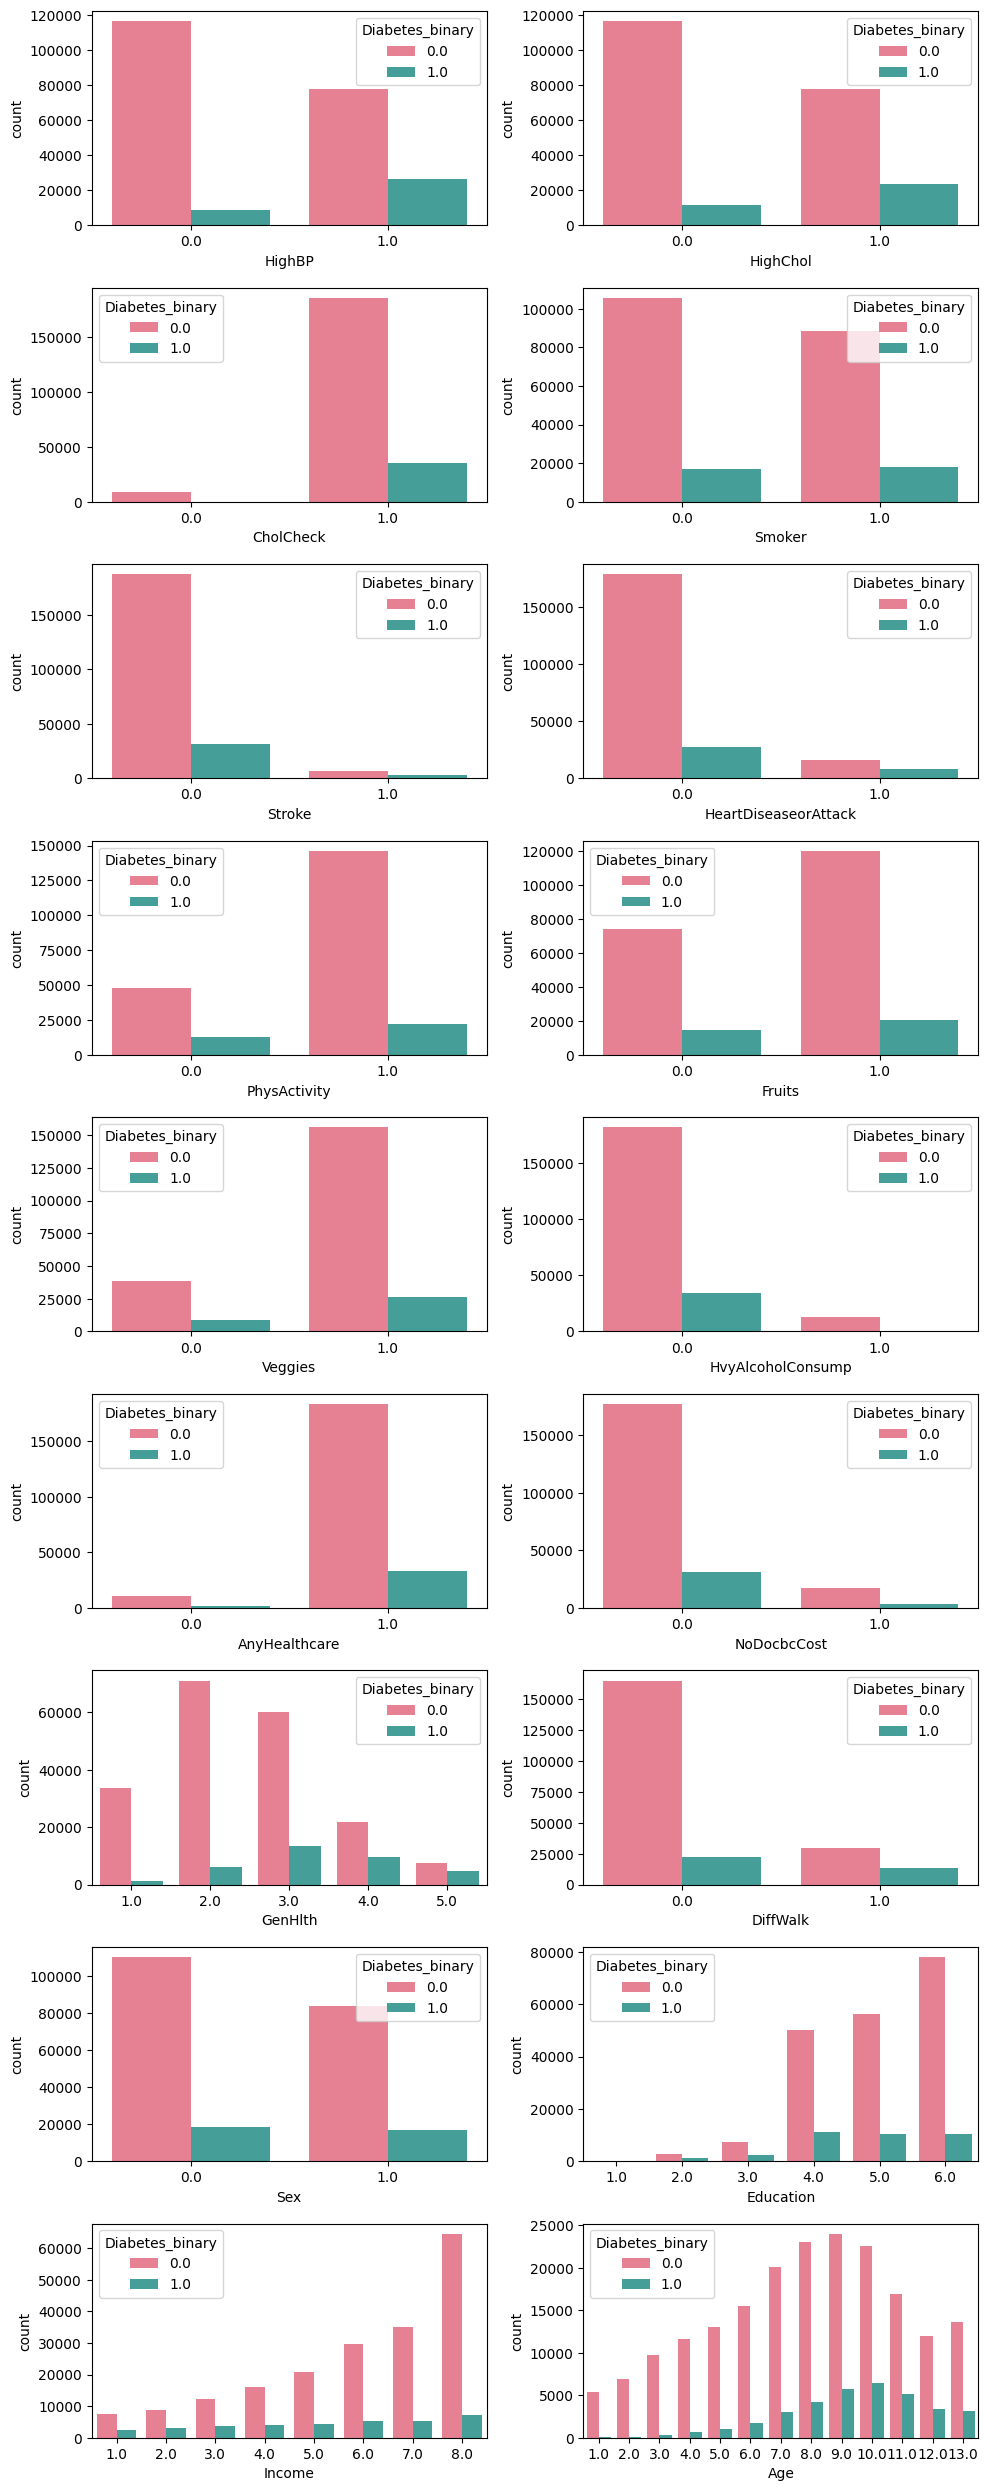

In [56]:
# Categorical - Categorical Analysis

fig, axis = plt.subplots(9, 2, figsize = (10, 25))

sns.countplot(ax = axis[0, 0], data = df, x = "HighBP", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[0, 1], data = df, x = "HighChol", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[1, 0], data = df, x = "CholCheck", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[1, 1], data = df, x = "Smoker", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[2, 0], data = df, x = "Stroke", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[2, 1], data = df, x = "HeartDiseaseorAttack", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[3, 0], data = df, x = "PhysActivity", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[3, 1], data = df, x = "Fruits", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[4, 0], data = df, x = "Veggies", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[4, 1], data = df, x = "HvyAlcoholConsump", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[5, 0], data = df, x = "AnyHealthcare", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[5, 1], data = df, x = "NoDocbcCost", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[6, 0], data = df, x = "GenHlth", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[6, 1], data = df, x = "DiffWalk", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[7, 0], data = df, x = "Sex", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[7, 1], data = df, x = "Education", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[8, 0], data = df, x = "Income", palette='husl', hue= "Diabetes_binary", legend=True)

sns.countplot(ax = axis[8, 1], data = df, x = "Age", palette='husl', hue= "Diabetes_binary", legend=True)


# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [57]:
df.isnull().sum().sort_values(ascending=False)


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

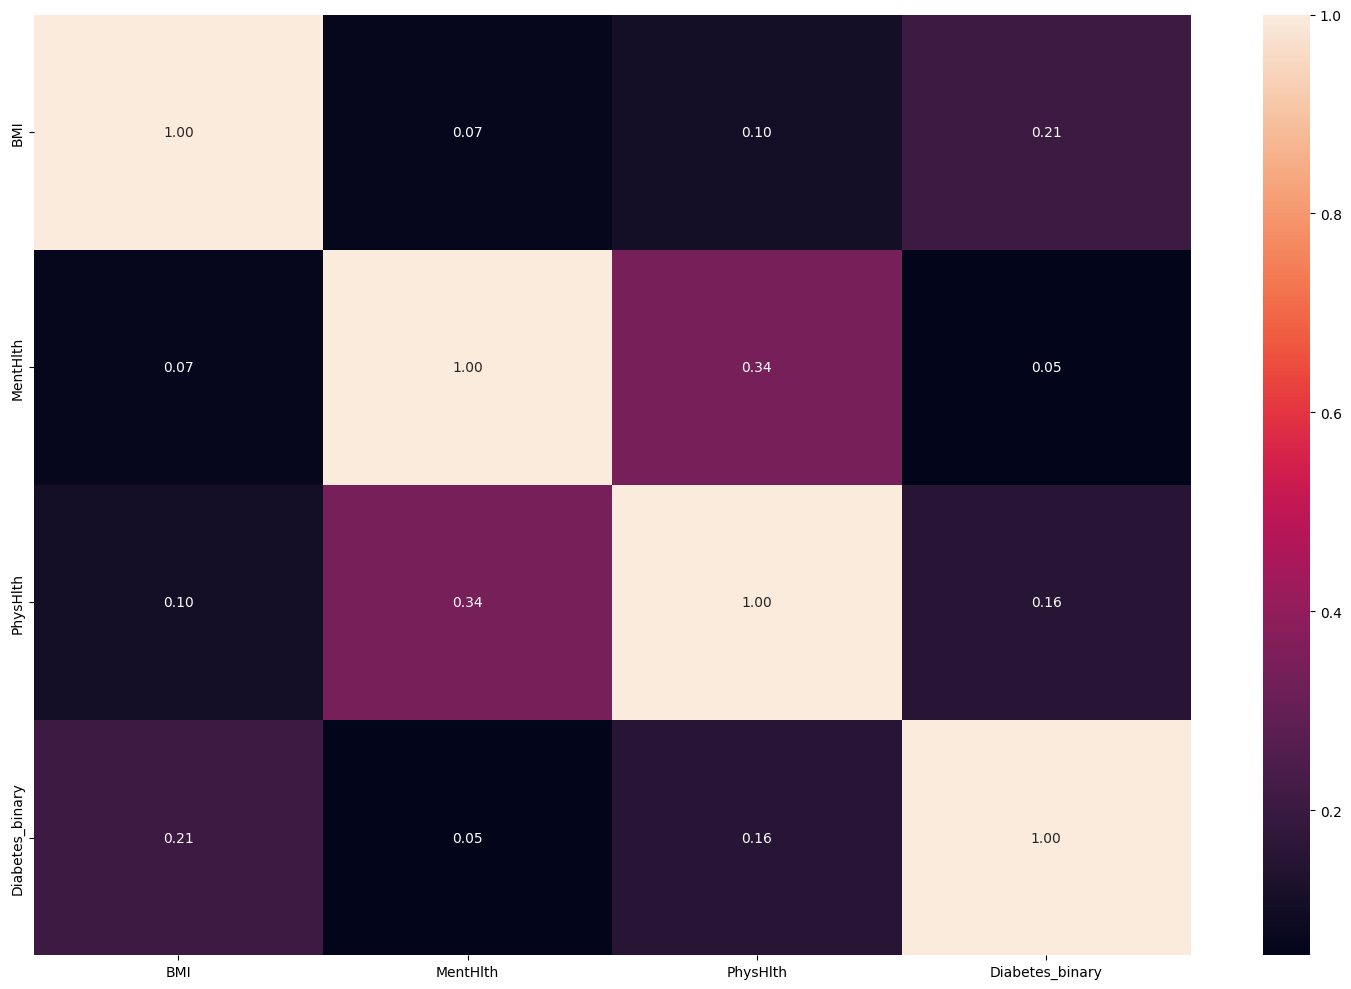

In [58]:
# Complete Numerical - Categorical Analysis

fig, axis = plt.subplots(figsize = (15, 10))

col_nums = ["BMI", "MentHlth", "PhysHlth", "Diabetes_binary"]

sns.heatmap(df[col_nums].corr(), annot = True, fmt = ".2f")

# Adjust the Layout
plt.tight_layout()

# Display the Plot
plt.show()

In [59]:
"""# Data resampling
from sklearn.utils import resample

# Split the dataset into subsets based on labels
label_0 = df[df['Diabetes_binary'] == 0]
label_1 = df[df['Diabetes_binary'] == 1]

# Determine the maximum size to balance
max_size = max(len(label_0), len(label_1))

# Augmenting underrepresented labels with synthetic data
label_0_balanced = resample(label_0, replace=True, n_samples=max_size, random_state=42)
label_1_balanced = resample(label_1, replace=True, n_samples=max_size, random_state=42)

# Combining balanced datasets
df = pd.concat([label_0_balanced, label_1_balanced])

# Mix the rows to avoid any order
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balance
print(df['Diabetes_binary'].value_counts())"""

"# Data resampling\nfrom sklearn.utils import resample\n\n# Split the dataset into subsets based on labels\nlabel_0 = df[df['Diabetes_binary'] == 0]\nlabel_1 = df[df['Diabetes_binary'] == 1]\n\n# Determine the maximum size to balance\nmax_size = max(len(label_0), len(label_1))\n\n# Augmenting underrepresented labels with synthetic data\nlabel_0_balanced = resample(label_0, replace=True, n_samples=max_size, random_state=42)\nlabel_1_balanced = resample(label_1, replace=True, n_samples=max_size, random_state=42)\n\n# Combining balanced datasets\ndf = pd.concat([label_0_balanced, label_1_balanced])\n\n# Mix the rows to avoid any order\ndf = df.sample(frac=1, random_state=42).reset_index(drop=True)\n\n# Check the balance\nprint(df['Diabetes_binary'].value_counts())"

In [60]:
# Splitting data into train and test sets
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [61]:
# # Scaling
# # Instantiate the scaler
# scaler = MinMaxScaler().fit(X_train)
# # Transformation and conversion to dataframe of scaled data
# X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
X_train_scaled = X_train
X_test_scaled = X_test


In [62]:
# ML Models
model = XGBClassifier(n_estimators=100, scale_pos_weight=6)
# Training
model.fit(X_train_scaled, y_train)
# Predict
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

Accuracy Test:  0.6996622725787123
F1 score Test:  0.44557959938862524
Precision Test:  0.31042986044947596
Recall Test:  0.7891437526713208
Accuracy Train:  0.7157518016766624
F1 score Train:  0.47297297297297297
Precision Train:  0.3300955818084417
Recall Train:  0.8339269178716433


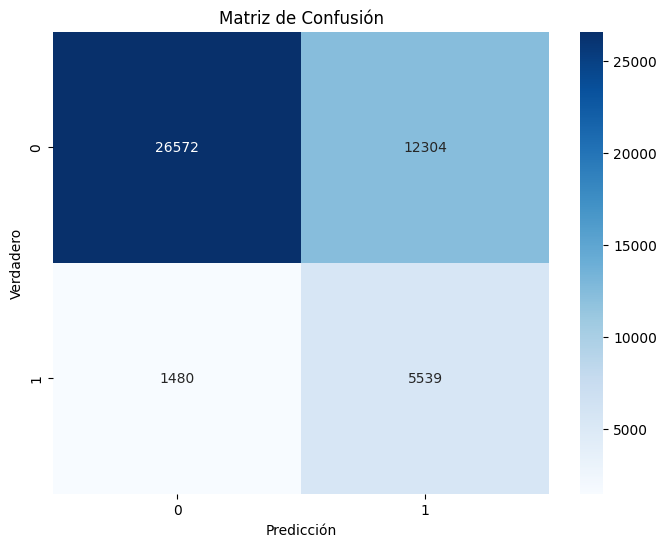

In [63]:
rain = model.predict(X_train_scaled)
# Metrics
# Classification
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Graph the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

parametros = {
    'n_estimators': [800, 900, 1000],          # Número de árboles a entrenar (más árboles puede mejorar el resultado, pero también aumenta el tiempo)
    'max_depth': [8, 10, 12],                  # Profundidad máxima de cada árbol (más profundidad = más complejidad)
    'learning_rate': [0.001, 0.01, 0.1],       # Tasa de aprendizaje (cuánto se ajusta el modelo en cada paso)
    'subsample': [0.95, 1.0],                  # Porcentaje de datos usados para cada árbol (útil para evitar overfitting)
    'colsample_bytree': [0.95, 1.0]            # Porcentaje de columnas usadas para cada árbol                 
}

In [ ]:
xgb = XGBClassifier(
    eval_metric='logloss',       # Métrica para evaluar durante el entrenamiento
    random_state=42              # Semilla fija para resultados reproducibles
    )

In [78]:
busqueda = GridSearchCV(xgb, parametros, scoring='recall', cv=3, verbose=1, n_jobs=-1)
busqueda.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.95, 1.0],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [8, 10, 12],
                         'n_estimators': [800, 900, 1000],
                         'subsample': [0.95, 1.0]},
             scoring='recall', verbose=1)

In [1]:
print("Mejores hiperparámetros:", busqueda.best_params_)
print("Mejor Recall:", busqueda.best_score_)

NameError: name 'busqueda' is not defined

En el codigo de arriba salieron estos resultados:

Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 1000, 'subsample': 0.95}

Mejor Recall: 0.23281565971356546